# Analyse des ordinateurs portables

 Ensemble de données sur les ordinateurs portables qui contient des informations sur divers aspects des ordinateurs portables tels que leur prix, leur remise, leurs spécifications et leur garantie. L’ensemble de données contient un total de 920 entrées, chacune représentant un seul ordinateur portable. Les données sont organisées en 10 colonnes, y compris « titre », « prix », « remise », « processeur », « RAM », « OS », « SSD », « Affichage », « In_build_sw » et « garantie ».
 
 ### Problématique :
 
L'objectif est faire l'analyse des ordinateurs portables et aide le developpeur à choisir un meilleur ordinateur .

Import les bonnes librairies qu’il nous faut (pandas, seaborn, matplotlib, numpy) :

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

Import du dataset laptops.csv récupéré depuis Kaggle:

In [2]:
df = pd.read_csv('laptops.csv')
print('dataset loaded')

dataset loaded


In [3]:
df.head()

,Unnamed: 0,title,price,discount,Processor,RAM,OS,SSD,Display,In_build_sw,warranty
0,0,DELL Vostro Core i3 11th Gen - (8 GB/1 TB HDD/...,"₹37,990","₹58,48935% off",Processor: Intel i3-1115G4 (Base- 1.7 GHz & Tu...,RAM & Storage: 8GB DDR4 & 1TB HDD + 256GB SSD,Graphics & Keyboard: Integrated & Standard Key...,"Display: 15.6"" FHD WVA AG Narrow Border",Intel Core i3 Processor (11th Gen),NaN,8 GB DDR4 RAM
1,1,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...,"₹35,490","₹47,20624% off",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,35.56 cm (14 inch) Display,NaN,1 Year Onsite Warranty
2,2,Lenovo V15 G2 Core i3 11th Gen - (8 GB/512 GB ...,"₹33,999","₹59,76043% off",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,No,1 Year Onsite Warranty + 1 Year Accidental Dam...
3,3,HP 15s Intel Core i3 12th Gen - (8 GB/512 GB S...,"₹45,490","₹56,26019% off",Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,Microsoft Office Home & Student 2021,1 Year Onsite Warranty
4,4,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,"₹33,990","₹45,99026% off",Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,Office Home and Student 2021,1 Year Onsite Warranty


La taille du dataset:

In [4]:
df.shape

(920, 11)

Un aperçu rapide de l’ensemble de données:

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   920 non-null    int64 
 1   title        920 non-null    object
 2   price        920 non-null    object
 3   discount     831 non-null    object
 4   Processor    920 non-null    object
 5   RAM          920 non-null    object
 6   OS           920 non-null    object
 7   SSD          920 non-null    object
 8   Display      920 non-null    object
 9   In_build_sw  357 non-null    object
 10  warranty     906 non-null    object
dtypes: int64(1), object(10)
memory usage: 79.2+ KB


Le type :

In [6]:
df.dtypes

Unnamed: 0      int64
title          object
price          object
discount       object
Processor      object
RAM            object
OS             object
SSD            object
Display        object
In_build_sw    object
warranty       object
dtype: object

Les colonnes:

In [7]:
df.columns

Index(['Unnamed: 0', 'title', 'price', 'discount', 'Processor', 'RAM', 'OS',
       'SSD', 'Display', 'In_build_sw', 'warranty'],
      dtype='object')

On supprime ₹ à l'aide d'une regex:

In [8]:
df["price"] = df["price"].replace(regex=r"\₹", value="").replace(regex=r"\,", value="")

In [45]:
df.head()

,Unnamed: 0,title,price,discount,Processor,RAM,OS,SSD,Display,In_build_sw,warranty,brand,SSD_value,pro_brand,item_price
1,1,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...,35490.0,47.20624,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,35.56 cm (14 inch) Display,NaN,1 Year Onsite Warranty,HP,256,Intel,18736.505424
2,2,Lenovo V15 G2 Core i3 11th Gen - (8 GB/512 GB ...,33999.0,59.76043,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,No,1 Year Onsite Warranty + 1 Year Accidental Dam...,Lenovo,512,Intel,13681.051404
3,3,HP 15s Intel Core i3 12th Gen - (8 GB/512 GB S...,45490.0,56.26019,Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,Microsoft Office Home & Student 2021,1 Year Onsite Warranty,HP,512,Intel,19897.239569
4,4,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,33990.0,45.99026,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,Office Home and Student 2021,1 Year Onsite Warranty,ASUS,512,Intel,18357.910626
5,5,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 7...,67990.0,94.99028,AMD Ryzen 7 Octa Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,43.94 cm (17.3 Inch) Display,NaN,1 Year onsite warranty,ASUS,512,AMD,3406.108628


On change le type de la colonne price en float :

In [10]:
df["price"] = df["price"].astype(float)
df.price.dtypes

dtype('float64')

Ajouter une colonne brand:

In [11]:
df['brand'] = df['title'].str.split(' ').str[0]
df.brand.value_counts() #Renvoyer une série contenant le nombre de lignes uniques dans le Df.

ASUS         263
HP           165
DELL         162
Lenovo       108
acer          62
MSI           50
APPLE         44
Infinix       31
SAMSUNG        8
GIGABYTE       7
realme         4
ALIENWARE      4
Avita          4
RedmiBook      2
LG             2
Nokia          1
Vaio           1
Mi             1
Ultimus        1
Name: brand, dtype: int64

In [47]:
df.head()


,Unnamed: 0,title,price,discount,Processor,RAM,OS,SSD,Display,In_build_sw,warranty,brand,SSD_value,pro_brand,item_price
1,1,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...,35490.0,47.20624,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,35.56 cm (14 inch) Display,NaN,1 Year Onsite Warranty,HP,256,Intel,18736.505424
2,2,Lenovo V15 G2 Core i3 11th Gen - (8 GB/512 GB ...,33999.0,59.76043,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,No,1 Year Onsite Warranty + 1 Year Accidental Dam...,Lenovo,512,Intel,13681.051404
3,3,HP 15s Intel Core i3 12th Gen - (8 GB/512 GB S...,45490.0,56.26019,Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,Microsoft Office Home & Student 2021,1 Year Onsite Warranty,HP,512,Intel,19897.239569
4,4,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,33990.0,45.99026,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,Office Home and Student 2021,1 Year Onsite Warranty,ASUS,512,Intel,18357.910626
5,5,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 7...,67990.0,94.99028,AMD Ryzen 7 Octa Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,43.94 cm (17.3 Inch) Display,NaN,1 Year onsite warranty,ASUS,512,AMD,3406.108628


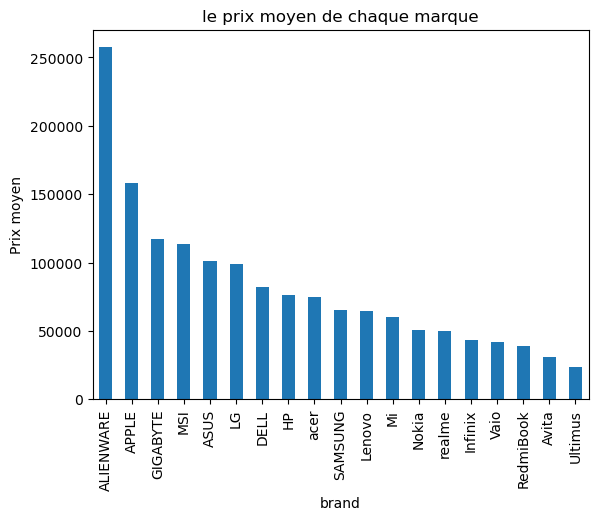

brand
ALIENWARE    257365.000000
APPLE        158166.136364
GIGABYTE     117489.571429
MSI          113372.180000
ASUS         101234.768061
LG            99322.000000
DELL          82452.018519
HP            76323.921212
acer          75025.000000
SAMSUNG       65490.000000
Lenovo        64282.407407
Mi            59990.000000
Nokia         50490.000000
realme        50240.000000
Infinix       43636.322581
Vaio          41990.000000
RedmiBook     38994.500000
Avita         30611.500000
Ultimus       23990.000000
Name: price, dtype: float64

In [13]:
df1 = df.groupby('brand')['price'].mean().sort_values(ascending=False)
#groupby
#sort_values:Triez en fonction des valeurs le long de l’un ou l’autre axe.
plt.title('le prix moyen de chaque marque')
df1.plot(kind='bar')
plt.ylabel('Prix moyen') #  Nommer l’axe des y
plt.show() #  Fonction pour afficher leplot

df1


In [14]:
# On supprime ₹ , % et off à l'aide d'une regex
df["discount"] = df["discount"].replace(regex=r"\₹", value="").replace(regex=r"\%", value="").replace(regex=r"off", value="")

df["discount"] = df["discount"].replace(regex=r"\,", value=".") 

In [48]:
df.head()

,Unnamed: 0,title,price,discount,Processor,RAM,OS,SSD,Display,In_build_sw,warranty,brand,SSD_value,pro_brand,item_price
1,1,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...,35490.0,47.20624,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,35.56 cm (14 inch) Display,NaN,1 Year Onsite Warranty,HP,256,Intel,18736.505424
2,2,Lenovo V15 G2 Core i3 11th Gen - (8 GB/512 GB ...,33999.0,59.76043,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,No,1 Year Onsite Warranty + 1 Year Accidental Dam...,Lenovo,512,Intel,13681.051404
3,3,HP 15s Intel Core i3 12th Gen - (8 GB/512 GB S...,45490.0,56.26019,Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,Microsoft Office Home & Student 2021,1 Year Onsite Warranty,HP,512,Intel,19897.239569
4,4,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,33990.0,45.99026,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,Office Home and Student 2021,1 Year Onsite Warranty,ASUS,512,Intel,18357.910626
5,5,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 7...,67990.0,94.99028,AMD Ryzen 7 Octa Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,43.94 cm (17.3 Inch) Display,NaN,1 Year onsite warranty,ASUS,512,AMD,3406.108628


In [16]:
#condition pour supprimer les lignes qui contiennent 2'.':
for i,r in df.iterrows():
    if type(r['discount'])== str:
        if r['discount'].count('.')>1:
            df = df.drop(i)
    else :
        df = df.drop(i)
        



In [50]:
df.head()

,Unnamed: 0,title,price,discount,Processor,RAM,OS,SSD,Display,In_build_sw,warranty,brand,SSD_value,pro_brand,item_price
1,1,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...,35490.0,47.20624,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,35.56 cm (14 inch) Display,NaN,1 Year Onsite Warranty,HP,256,Intel,18736.505424
2,2,Lenovo V15 G2 Core i3 11th Gen - (8 GB/512 GB ...,33999.0,59.76043,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,No,1 Year Onsite Warranty + 1 Year Accidental Dam...,Lenovo,512,Intel,13681.051404
3,3,HP 15s Intel Core i3 12th Gen - (8 GB/512 GB S...,45490.0,56.26019,Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,Microsoft Office Home & Student 2021,1 Year Onsite Warranty,HP,512,Intel,19897.239569
4,4,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,33990.0,45.99026,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,Office Home and Student 2021,1 Year Onsite Warranty,ASUS,512,Intel,18357.910626
5,5,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 7...,67990.0,94.99028,AMD Ryzen 7 Octa Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,43.94 cm (17.3 Inch) Display,NaN,1 Year onsite warranty,ASUS,512,AMD,3406.108628


In [18]:
#calculer le prix - la remise :
df['discount']=df['discount'].astype(float)

In [19]:
df.dtypes

Unnamed: 0       int64
title           object
price          float64
discount       float64
Processor       object
RAM             object
OS              object
SSD             object
Display         object
In_build_sw     object
warranty        object
brand           object
dtype: object

In [51]:
df.head()

,Unnamed: 0,title,price,discount,Processor,RAM,OS,SSD,Display,In_build_sw,warranty,brand,SSD_value,pro_brand,item_price
1,1,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...,35490.0,47.20624,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,35.56 cm (14 inch) Display,NaN,1 Year Onsite Warranty,HP,256,Intel,18736.505424
2,2,Lenovo V15 G2 Core i3 11th Gen - (8 GB/512 GB ...,33999.0,59.76043,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,No,1 Year Onsite Warranty + 1 Year Accidental Dam...,Lenovo,512,Intel,13681.051404
3,3,HP 15s Intel Core i3 12th Gen - (8 GB/512 GB S...,45490.0,56.26019,Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,Microsoft Office Home & Student 2021,1 Year Onsite Warranty,HP,512,Intel,19897.239569
4,4,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,33990.0,45.99026,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,Office Home and Student 2021,1 Year Onsite Warranty,ASUS,512,Intel,18357.910626
5,5,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 7...,67990.0,94.99028,AMD Ryzen 7 Octa Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,43.94 cm (17.3 Inch) Display,NaN,1 Year onsite warranty,ASUS,512,AMD,3406.108628


In [25]:
#ajouter une colonne de la mémoire 
df['SSD_value'] = df['SSD'].str.split(' ').str[0]
df = df[df['SSD_value'].isin(['512', '256','126','64'])]
df.SSD_value.value_counts() #Renvoyer une série contenant le nombre de lignes uniques dans le Df.


512    322
256     99
64       4
Name: SSD_value, dtype: int64

In [26]:
df['SSD_value']=df['SSD_value'].astype(int)

In [27]:
df.dtypes

Unnamed: 0       int64
title           object
price          float64
discount       float64
Processor       object
RAM             object
OS              object
SSD             object
Display         object
In_build_sw     object
warranty        object
brand           object
SSD_value        int32
dtype: object

In [29]:
#ajouter une colonne pour la marque du processeur
df['pro_brand'] = df['Processor'].str.split(' ').str[0]
df = df[df['pro_brand'].isin(['Intel', 'AMD','Apple','NVIDIA'])]

In [30]:
df.head()

,Unnamed: 0,title,price,discount,Processor,RAM,OS,SSD,Display,In_build_sw,warranty,brand,SSD_value,pro_brand
1,1,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...,35490.0,47.20624,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,35.56 cm (14 inch) Display,NaN,1 Year Onsite Warranty,HP,256,Intel
2,2,Lenovo V15 G2 Core i3 11th Gen - (8 GB/512 GB ...,33999.0,59.76043,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,No,1 Year Onsite Warranty + 1 Year Accidental Dam...,Lenovo,512,Intel
3,3,HP 15s Intel Core i3 12th Gen - (8 GB/512 GB S...,45490.0,56.26019,Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,Microsoft Office Home & Student 2021,1 Year Onsite Warranty,HP,512,Intel
4,4,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,33990.0,45.99026,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,Office Home and Student 2021,1 Year Onsite Warranty,ASUS,512,Intel
5,5,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 7...,67990.0,94.99028,AMD Ryzen 7 Octa Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,43.94 cm (17.3 Inch) Display,NaN,1 Year onsite warranty,ASUS,512,AMD


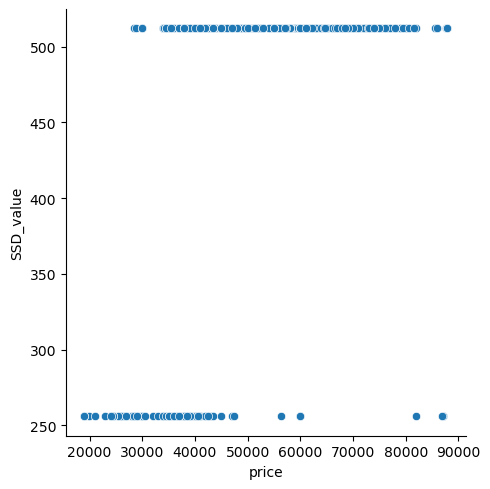

In [36]:
#corrélation
sns.relplot(x="price",y="SSD_value",data=df)

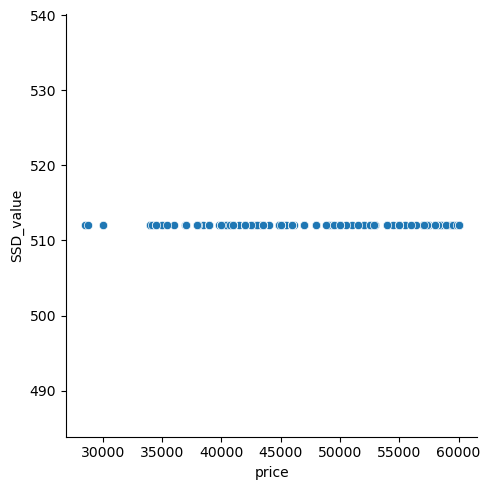

In [38]:
##visualisation en ne gardant uniquement les prix <60000 et la mémoire >256
df_filter = df.query("price < 60000  & SSD_value > 256")
sns.relplot(x="price",y="SSD_value",data=df_filter)



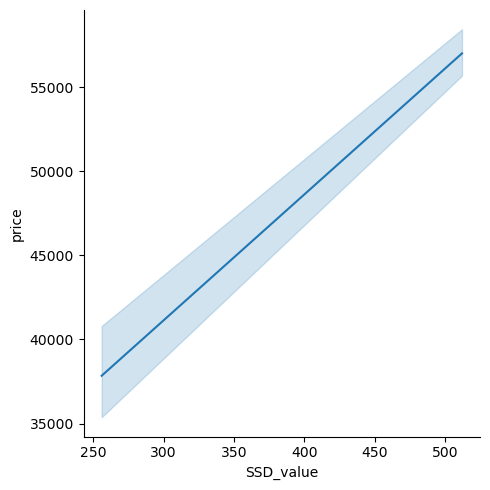

In [57]:
sns.relplot(x="SSD_value", y='price', data=df, kind='line')
plt.show()

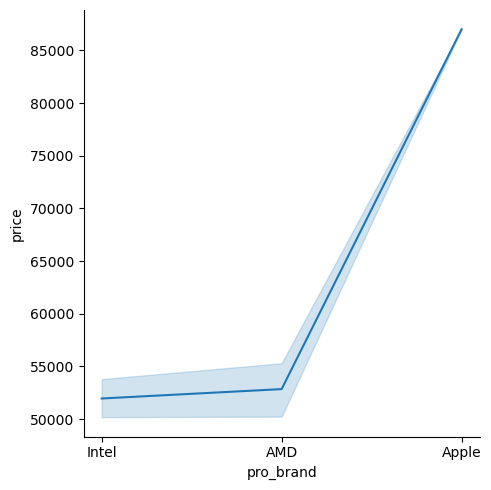

In [41]:
sns.relplot(x='pro_brand', y='price', data=df, kind='line')
plt.show()

In [42]:
#calculer le prix - la remise:
df['item_price'] = df['price']- (df['price']*df['discount'])/100

In [52]:
df.head()

,Unnamed: 0,title,price,discount,Processor,RAM,OS,SSD,Display,In_build_sw,warranty,brand,SSD_value,pro_brand,item_price
1,1,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...,35490.0,47.20624,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,35.56 cm (14 inch) Display,NaN,1 Year Onsite Warranty,HP,256,Intel,18736.505424
2,2,Lenovo V15 G2 Core i3 11th Gen - (8 GB/512 GB ...,33999.0,59.76043,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,No,1 Year Onsite Warranty + 1 Year Accidental Dam...,Lenovo,512,Intel,13681.051404
3,3,HP 15s Intel Core i3 12th Gen - (8 GB/512 GB S...,45490.0,56.26019,Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,Microsoft Office Home & Student 2021,1 Year Onsite Warranty,HP,512,Intel,19897.239569
4,4,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,33990.0,45.99026,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,Office Home and Student 2021,1 Year Onsite Warranty,ASUS,512,Intel,18357.910626
5,5,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 7...,67990.0,94.99028,AMD Ryzen 7 Octa Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,43.94 cm (17.3 Inch) Display,NaN,1 Year onsite warranty,ASUS,512,AMD,3406.108628


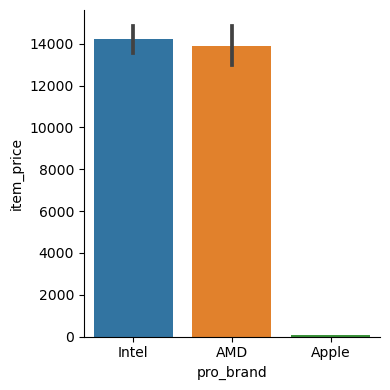

In [56]:
sns.catplot(x="pro_brand", y="item_price", data= df, kind="bar", height=4)

# Conclusion:
le prix varie de la marque et le processeur 